In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [54]:
# load the dataset
def load_dataset(filename : str, input_variable : list, output_variable : str) -> (pd.DataFrame, pd.DataFrame) :
    # TODO : faire la docstring
    # load the dataset as a pandas DataFrame
    dataframe_wine = pd.read_csv(filename)

    # split into input (X) and output (y) variables
    input_data = dataframe_wine[input_variable]
    output_data = dataframe_wine[output_variable]
    
    # format all fields as float for input variables, and as int for output variables
    input_data = input_data.astype(float)
    output_data = output_data.astype(int)

    return dataframe_wine, input_data, output_data

In [56]:
# Données d'entrée
filename = './datasource/Wines.csv'

# Variables explicatives
input_variable = [
    'fixed acidity', 
    'volatile acidity', 
    'citric acid', 
    'residual sugar',
    'chlorides', 
    'free sulfur dioxide', 
    'total sulfur dioxide', 
    'density',
    'pH', 
    'sulphates', 
    'alcohol']

# Variable cible
output_variable = 'quality'

# Chargement du dataset et séparation les variables explicatives et la variable cible
dataframe_wine, input_data, output_data = load_dataset(filename, input_variable, output_variable)

# 1 - Data Preparation

## 1.1 - Missing values

In [57]:
dataframe_wine.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

We don't hava any missing values in our dataset

## 1.2 - Categorial Variables

In [58]:
dataframe_wine.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
Id                        int64
dtype: object

# 2 - Regression

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn import preprocessing

In [60]:
# Séparation du jeu de données en base d'apprentissage (75%) et base de test (25%)
input_data_train, input_data_test, output_data_train, output_data_test = train_test_split(input_data, output_data, test_size=0.25, random_state=1)


In [61]:
model_lr = LinearRegression()
model_lr.fit(input_data_train, output_data_train)

y_pred = model_lr.predict(input_data_test)
y_pred = (np.rint(y_pred)).astype(int)
    
print("Training set score: {:.7f}".format(model_lr.score(input_data_train, output_data_train)))
print("Test set score: {:.7f}".format(model_lr.score(input_data_test, output_data_test)))
print("RMSE: {:.7f}".format(np.sqrt(metrics.mean_squared_error(output_data_test, y_pred))))

Training set score: 0.3589227
Test set score: 0.4080472
RMSE: 0.6450457


R² nul

# 3 - Check Model Adequacy



To improve our score we should take a look at the assumptions our model is making. We are using linear regression so we should check our data regarding:

* Linearity
* Outliers
* Homoscedasticity
* Normality
* Multicollinearity


## 3.1 - Linearity

### Actual vs. Predicted Plot

314     5
698     5
846     6
1136    6
1097    6
       ..
965     5
892     5
897     6
538     6
215     5
Name: quality, Length: 286, dtype: int64
[6 5 6 6 5 7 5 5 6 5 6 5 5 5 6 6 5 6 5 6 5 6 5 6 6 6 5 6 6 6 5 6 7 5 5 5 6
 6 6 5 7 6 7 6 6 6 6 5 5 5 6 5 5 5 5 5 5 5 5 6 5 6 6 6 5 6 5 5 6 5 6 6 6 6
 5 5 5 5 5 6 5 5 6 6 6 6 5 6 5 6 5 6 6 6 5 5 6 6 6 5 6 6 5 6 6 6 6 5 5 6 6
 5 6 5 7 6 5 5 6 6 6 5 7 6 5 5 5 5 5 5 5 6 5 6 7 6 5 5 6 5 5 6 6 5 6 7 5 6
 5 6 7 5 5 5 5 6 6 5 6 5 5 6 5 5 5 5 5 6 5 6 5 6 5 7 6 6 6 6 6 6 6 7 6 6 5
 6 7 6 5 6 6 5 6 5 6 6 5 6 5 5 6 5 6 5 6 6 6 5 5 5 6 5 5 5 6 6 6 5 6 6 6 6
 6 5 6 7 6 5 6 5 5 5 6 6 5 6 5 5 5 7 5 5 5 6 5 6 6 6 6 6 6 6 5 6 6 6 5 6 6
 5 5 6 7 5 5 6 5 5 5 7 5 6 7 6 5 5 6 6 7 6 6 5 6 5 5 5]


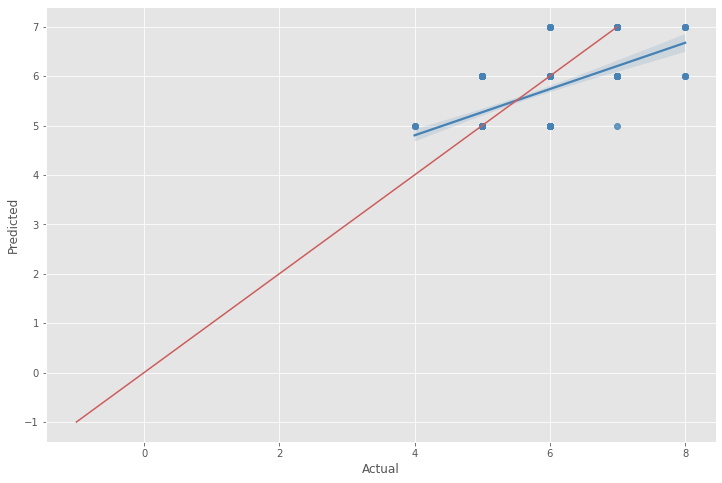

In [65]:
def calculate_residuals(model, features, label):
    predictions = model_lr.predict(features)
    predictions = (np.rint(predictions)).astype(int)
    print(label)
    print(predictions)
    df_result = pd.DataFrame.from_dict({'Actual':label.values, 'Predicted':predictions})
    df_result['Residuals'] = abs(df_result['Actual']) - abs(df_result['Predicted'])
    return df_result


def linear_assumption(model, features, label):
    df_result = calculate_residuals(model, features, label)
    fig1, ax1 = plt.subplots(figsize=(12,8))
    ax1 = sns.regplot(x='Actual', y='Predicted', data=df_result, color='steelblue')
    line_coords = np.arange(df_result.min().min(), df_result.max().max())
    ax1 = plt.plot(line_coords, line_coords,  # X and y points
              color='indianred')

linear_assumption(model_lr, input_data_test, output_data_test)

### Residual Plot

314     5
698     5
846     6
1136    6
1097    6
       ..
965     5
892     5
897     6
538     6
215     5
Name: quality, Length: 286, dtype: int64
[6 5 6 6 5 7 5 5 6 5 6 5 5 5 6 6 5 6 5 6 5 6 5 6 6 6 5 6 6 6 5 6 7 5 5 5 6
 6 6 5 7 6 7 6 6 6 6 5 5 5 6 5 5 5 5 5 5 5 5 6 5 6 6 6 5 6 5 5 6 5 6 6 6 6
 5 5 5 5 5 6 5 5 6 6 6 6 5 6 5 6 5 6 6 6 5 5 6 6 6 5 6 6 5 6 6 6 6 5 5 6 6
 5 6 5 7 6 5 5 6 6 6 5 7 6 5 5 5 5 5 5 5 6 5 6 7 6 5 5 6 5 5 6 6 5 6 7 5 6
 5 6 7 5 5 5 5 6 6 5 6 5 5 6 5 5 5 5 5 6 5 6 5 6 5 7 6 6 6 6 6 6 6 7 6 6 5
 6 7 6 5 6 6 5 6 5 6 6 5 6 5 5 6 5 6 5 6 6 6 5 5 5 6 5 5 5 6 6 6 5 6 6 6 6
 6 5 6 7 6 5 6 5 5 5 6 6 5 6 5 5 5 7 5 5 5 6 5 6 6 6 6 6 6 6 5 6 6 6 5 6 6
 5 5 6 7 5 5 6 5 5 5 7 5 6 7 6 5 5 6 6 7 6 6 5 6 5 5 5]


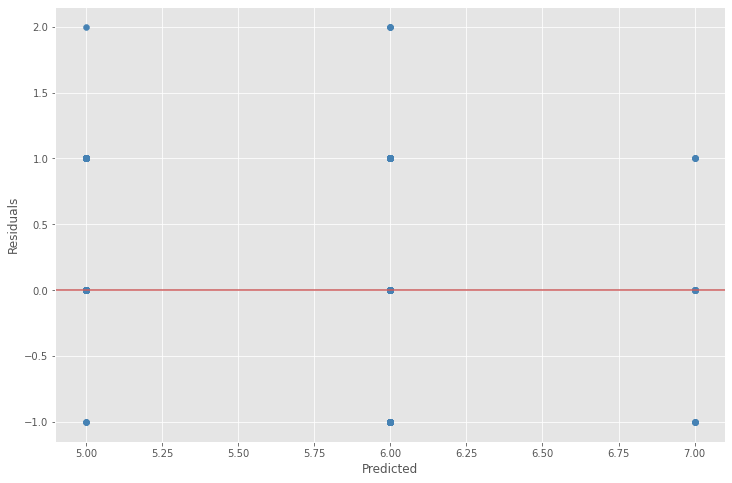

In [66]:
df_result = calculate_residuals(model_lr, input_data_test, output_data_test)

fig2, ax2 = plt.subplots(figsize=(12,8))
ax2.scatter(
    x = df_result['Predicted'], 
    y = df_result['Residuals'], 
    color='steelblue')

plt.axhline(y = 0, color = 'indianred')
ax2.set_ylabel('Residuals', fontsize=12)
ax2.set_xlabel('Predicted', fontsize=12)
plt.show()

Nous pouvons vérifier la linéarité de notre modèle en examinant le graphique réel par rapport au graphique prédit ou le graphique prédit par rapport aux résidus. Pour la linéarité dans le cas du premier, les points de données devraient être distribués symétriquement autour de la ligne diagonale. Ce n'est pas le cas ici, car nos prédictions sont biaisées, surtout pour les valeurs élevées. De même, pour la linéarité dans le cas de la seconde, les points de données devraient être distribués symétriquement autour de la ligne horizontale. Comme observé cependant, la variance résiduelle augmente avec des valeurs plus élevées. Cela indique la violation des hypothèses sous-jacentes et est traité dans une section ultérieure. (J'ai trouvé les fonctions sur ce blog : https://jeffmacaluso.github.io/post/LinearRegressionAssumptions/)

### Outliers


Avant de revenir sur l'hypothèse de linéarité, nous allons nous concentrer sur un autre problème qui apparaît dans les graphiques : Les valeurs aberrantes. Notre modèle n'a pas réussi à prédire certaines valeurs de manière significative, il est donc intéressant de jeter un coup d'œil à la distribution des prix.

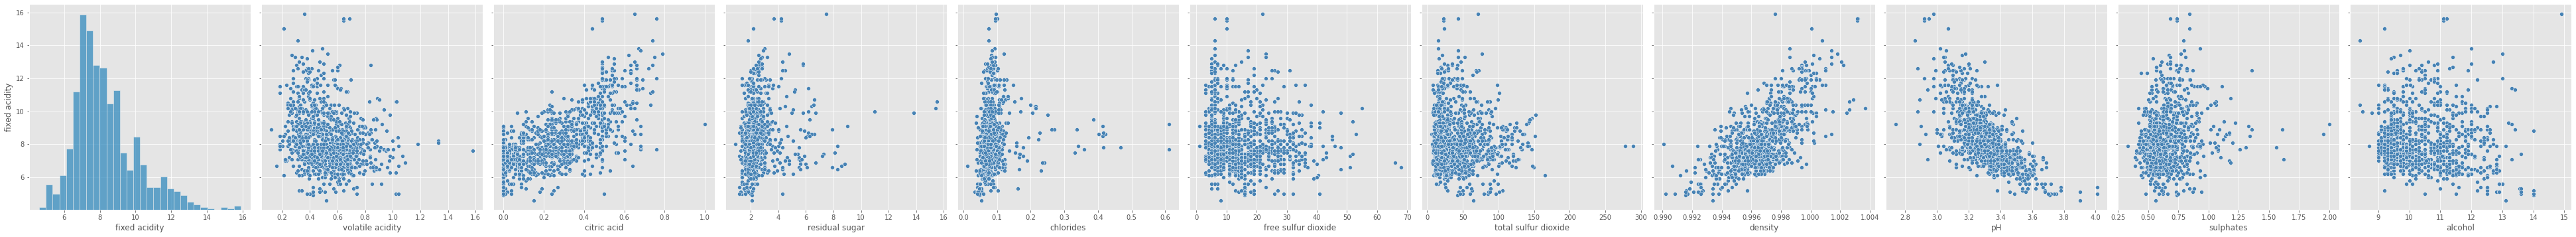

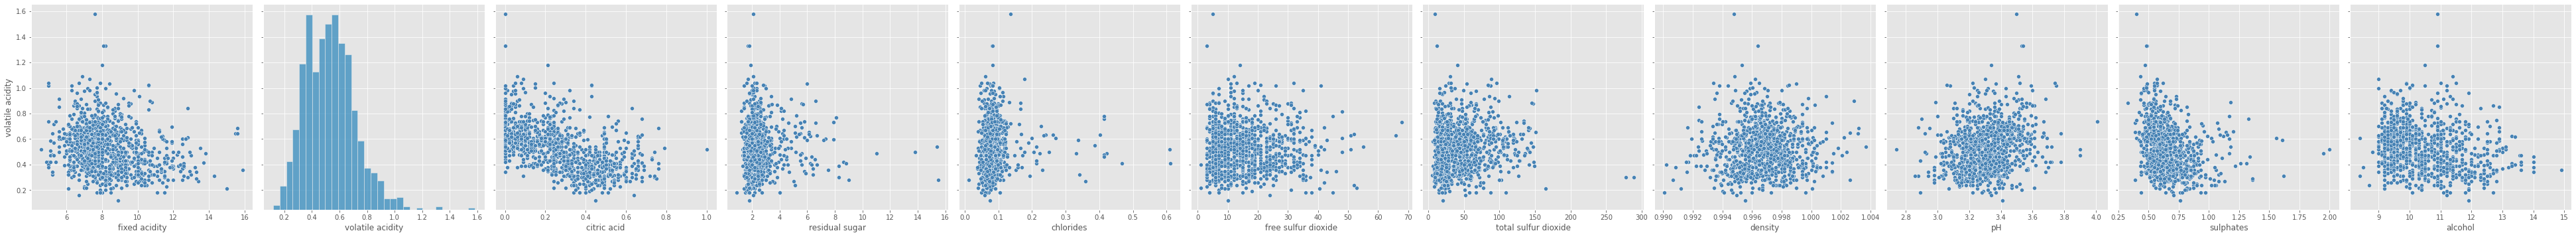

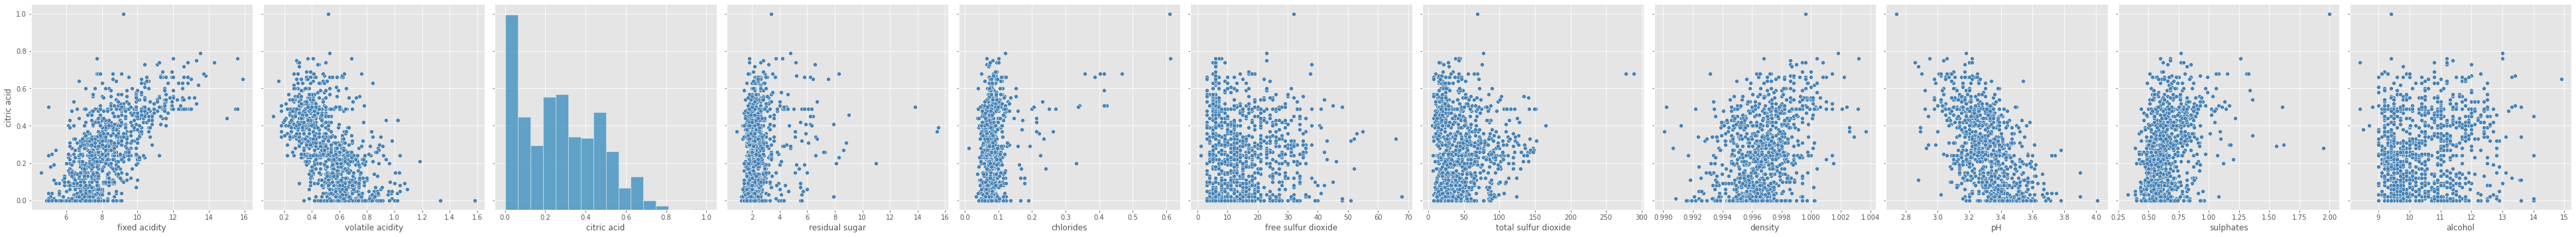

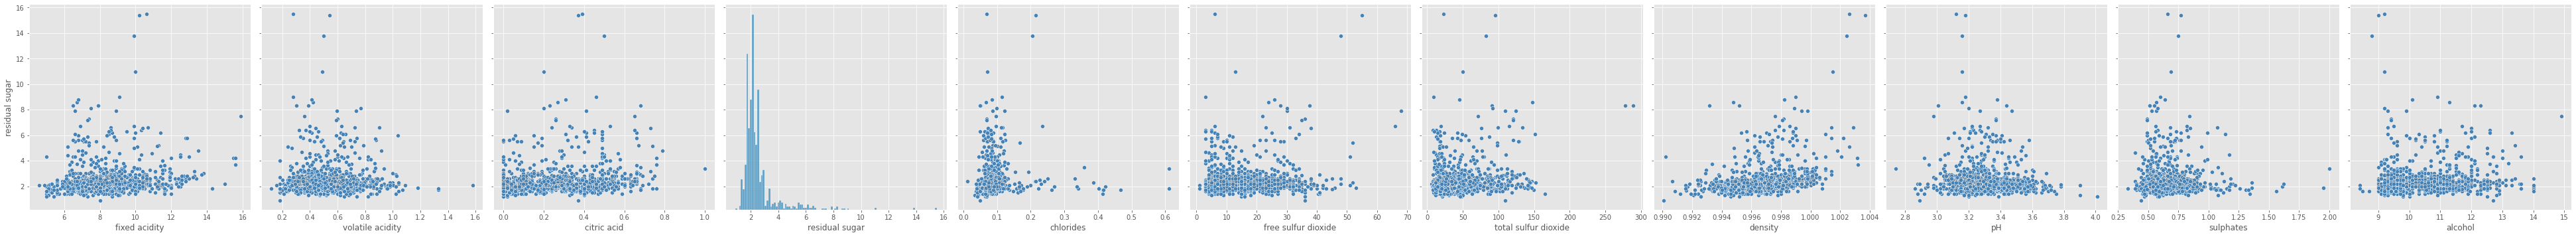

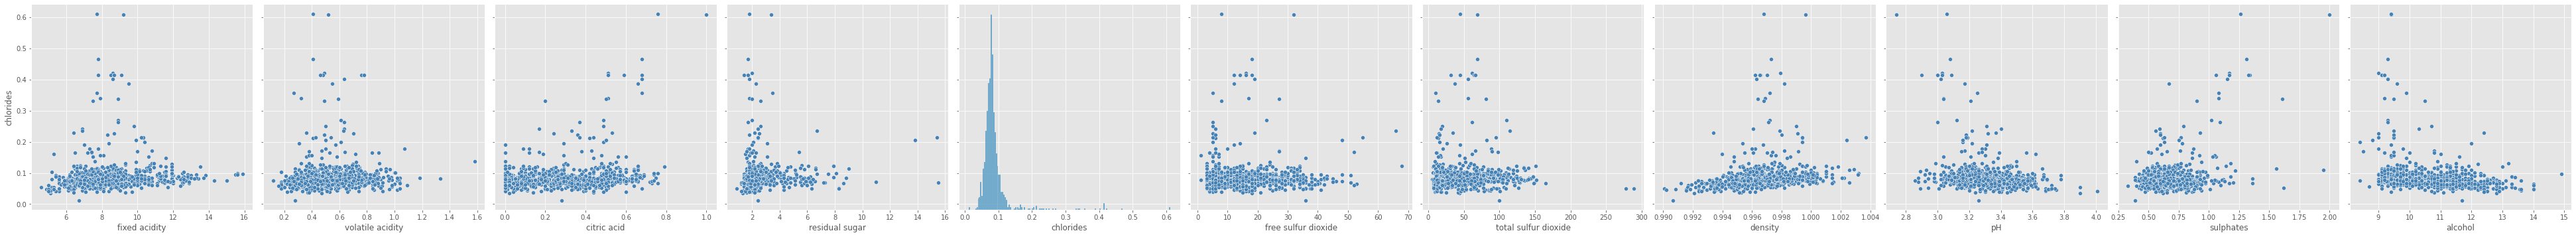

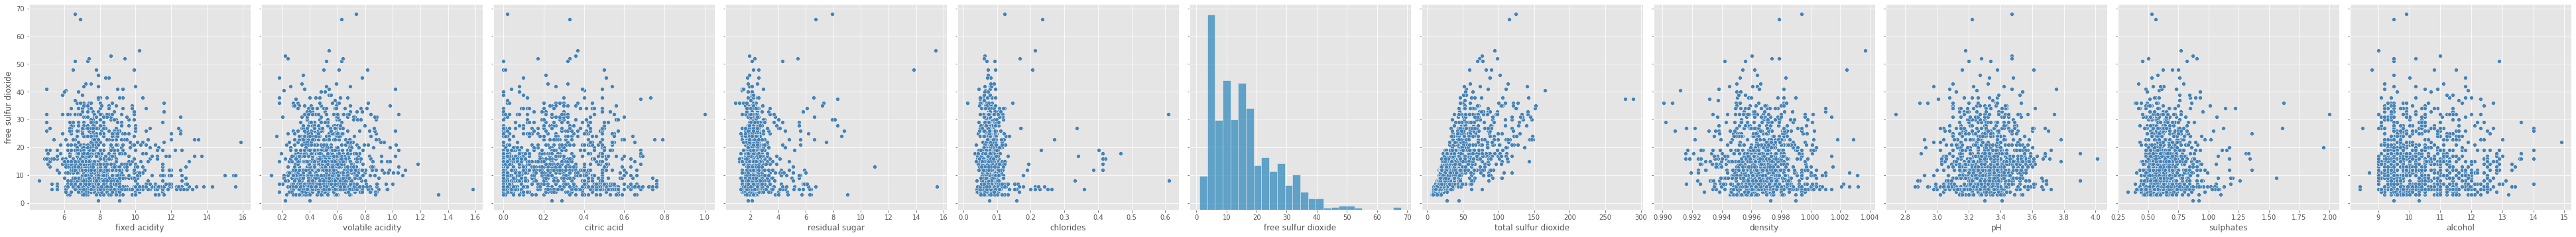

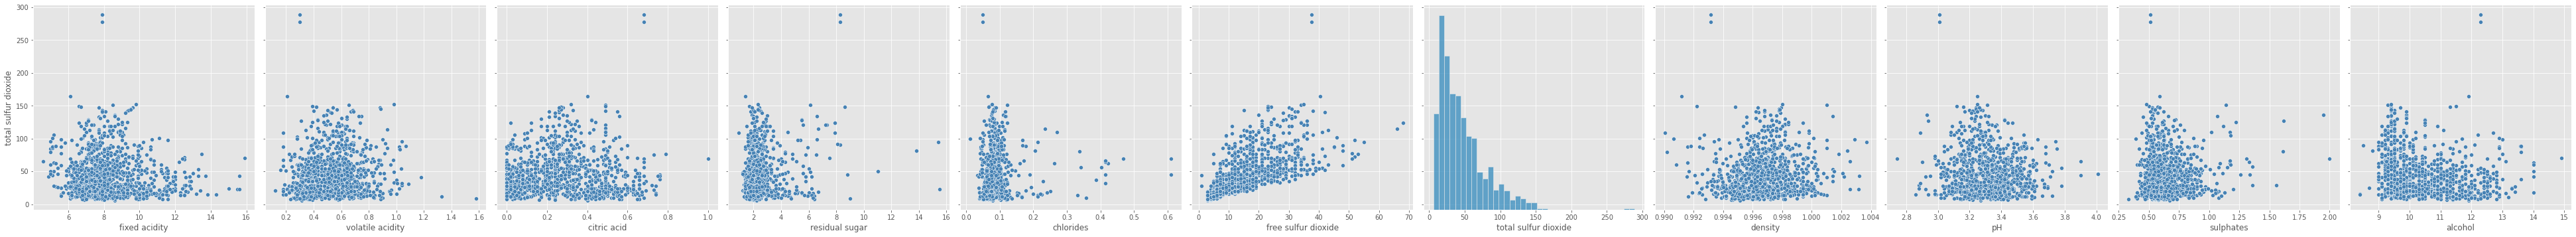

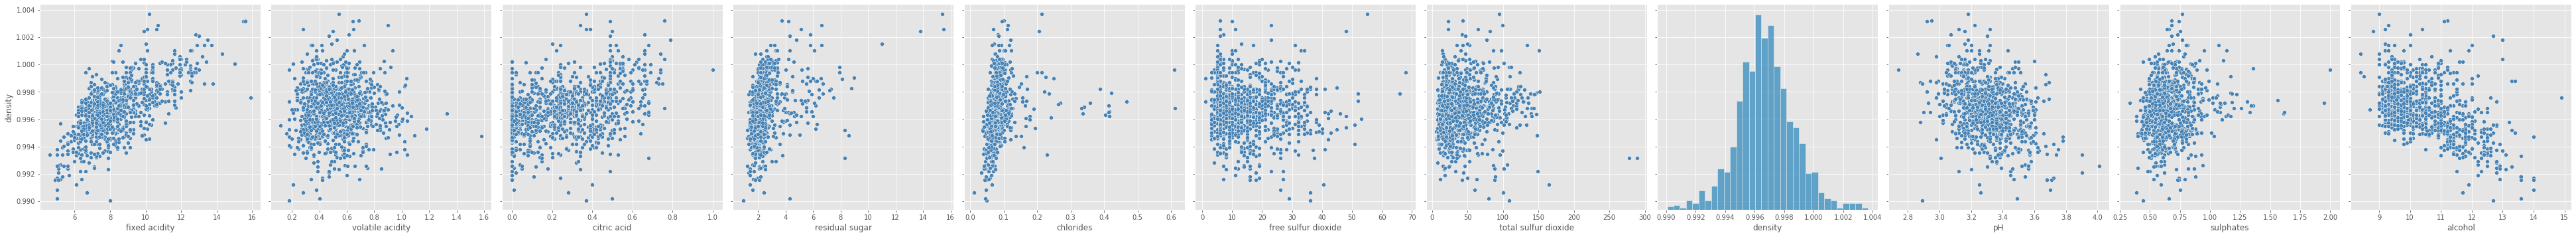

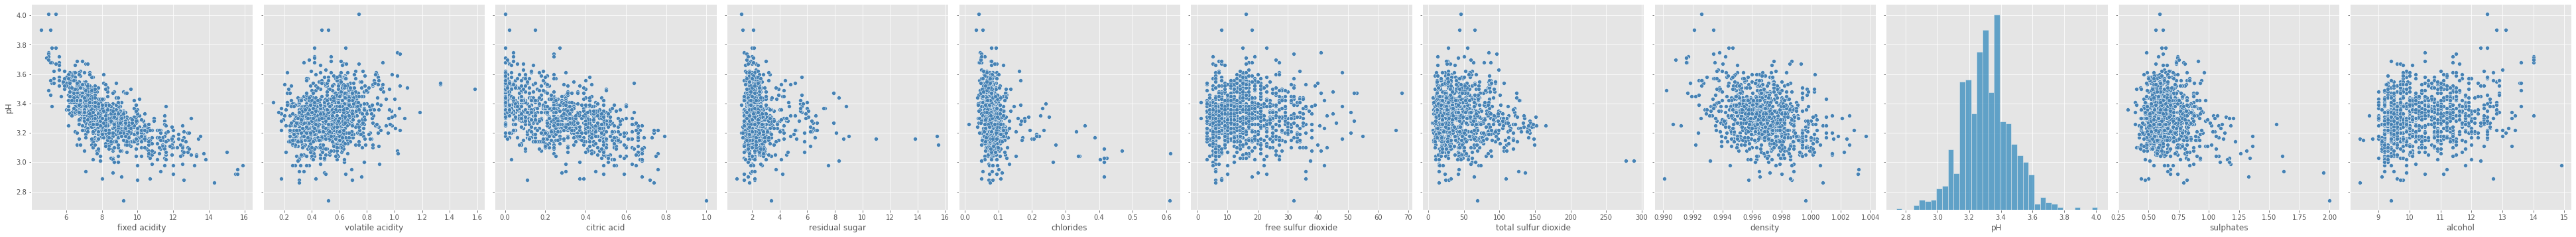

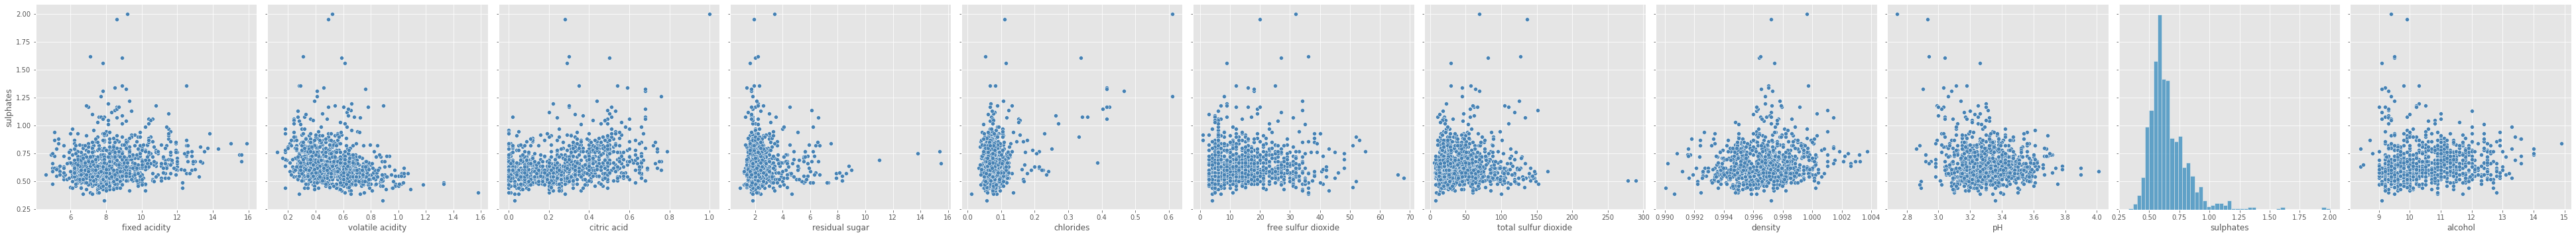

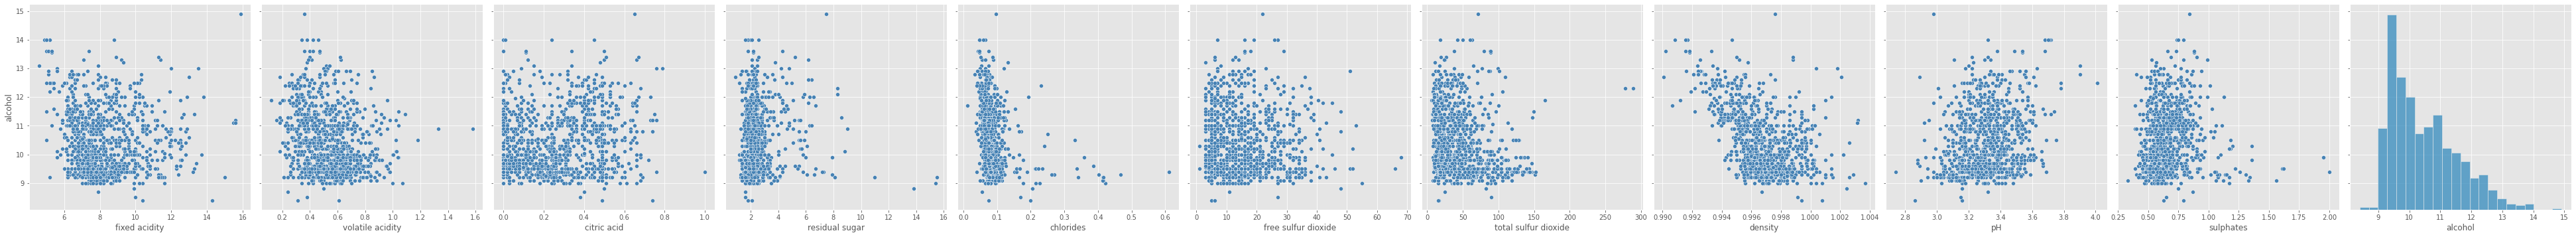

In [77]:
"""plt.style.use('ggplot')
fig3, ax3 = plt.subplots(figsize=(15,4))
ax3 = sns.boxplot(data = input_data)
"""
"""for val in input_variable:
    print(val)
    plt.style.use('ggplot')
    fig3, ax3 = plt.subplots(figsize=(15,4))
    ax3 = sns.boxplot(data = dataframe_wine[val])
"""
for val in input_variable:
    plt.style.use('ggplot')
    sns.pairplot(input_data, y_vars=[val], x_vars= input_variable, height=5, plot_kws={'color':'steelblue'})
    
plt.show()

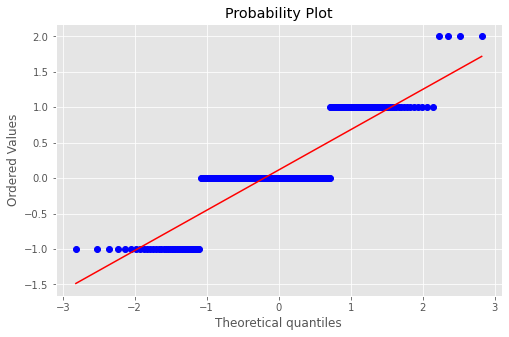

In [78]:
from scipy import stats
fig16, ax16 = plt.subplots(figsize=(8,5))
stats.probplot(output_data_test - y_pred, plot=plt)
plt.show()

In [79]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# from statsmodels.tools.tools import add_constant

vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(input_data_test.values, i) for i in range(input_data_test.shape[1])]
vif["features"] = input_data_test.columns



vif['VIF'] = vif['VIF'].apply(lambda x: "{:.2f}".format(x))
print(vif)

        VIF              features
0     84.10         fixed acidity
1     19.57      volatile acidity
2     10.97           citric acid
3      9.08        residual sugar
4      7.32             chlorides
5      6.72   free sulfur dioxide
6      6.19  total sulfur dioxide
7   1335.73               density
8    959.16                    pH
9     24.25             sulphates
10   123.03               alcohol


Apparemment, la plupart de nos variables sont affectées par la multicollinéarité. C'est un problème, notamment lors de l'interprétation des coefficients et des effets individuels que les variables indépendantes ont sur la variable dépendante. Cependant, notre objectif ici est principalement la précision de la prédiction, donc nous n'avons pas à nous soucier trop de la colinéarité. (Ce blog, parmi d'autres, fournit une vue d'ensemble sur les cas où la multicollinéarité doit être abordée et ceux où elle ne doit pas l'être : https://statisticsbyjim.com/regression/multicollinearity-in-regression-analysis/).

Bcp de multi-colinéarité car vif très élevé (si ça dépasse 10 en général)

In [81]:
print(np.mean((output_data_test - y_pred)**2))

0.4160839160839161


In [83]:
import statsmodels.api as sm

#add constant to predictor variables
input_data_train_model = sm.add_constant(input_data_train)

#fit linear regression model
model = sm.OLS(output_data_train, input_data_train_model).fit()

#view model summary
print(model.summary())

print("\n\n\nParamètres = {}".format(model.params))
print("\n\n\nR² = {}".format(model.rsquared))

ImportError: cannot import name '_centered' from 'scipy.signal.signaltools' (/home/cytech/anaconda3/lib/python3.8/site-packages/scipy/signal/signaltools.py)